## Import the Required Libraries and Data

In [1]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

## Exploring the data

In [2]:
df_wine=pd.read_csv('QualityPrediction.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# See the number of rows and columns
print("Rows, columns: " + str(df_wine.shape))
# See the first five rows of the dataset
df_wine.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Missing Value checks and Data Cleaning

In [4]:
df_wine.apply(lambda x: x.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
print("Here's the data types of our columns:\n",df_wine.dtypes)

Here's the data types of our columns:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


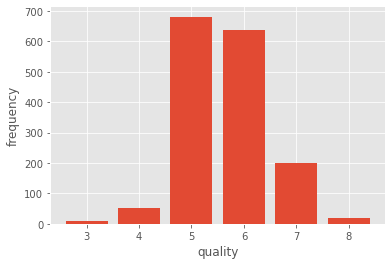

In [7]:
quality_dist = df_wine['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

Now that we got information about our target variable we are going to study the correlation between quality and other features and see which are the ones that play an important role in deciding the quality of a wine.

In [8]:
#Calculate and order correlations
correlations = df_wine.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


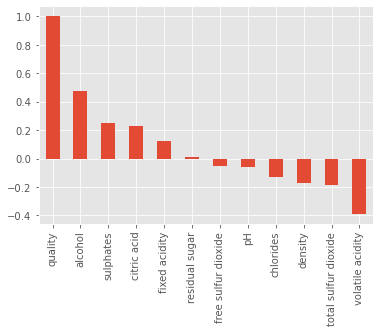

In [9]:
correlations.plot(kind='bar')

Having now the correlation values between quality and the other features, let's have a look at the correlation matrix to have a better understanding of how features correlate with each other.

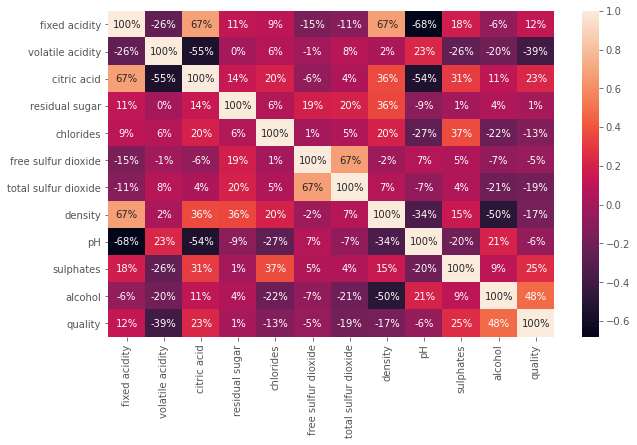

In [10]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(df_wine.corr(), annot=True, fmt='.0%')

From this matrix we can observe, apart from the information we had before, some obvious feature correlations such as pH and acidity. Apart from that, we get to know the percentage of the correlations we obtained before. We can also observe that approximately half of these features correlate positively with quality while the other half correlate negatively.

From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [11]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


From all the values, we are selecting alcohol, sulphates, citric acid and volatile acidity in order to study them better and see the distribution of values that separate the different qualities.

### Alcohol Percent

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

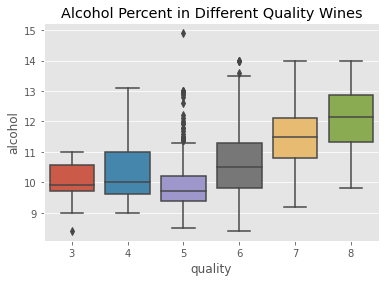

In [12]:
bp = sns.boxplot(x='quality',y='alcohol', data=df_wine)
bp.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values. Let's do some further investigation now:

In order to see why we do have these different values, we are going to select a subset of the dataset which will only contain rows whose quality column value is 5 or 6, and we will calculate correlation coefficients for this subset.

### Sulphates and Citric Acid Presence

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

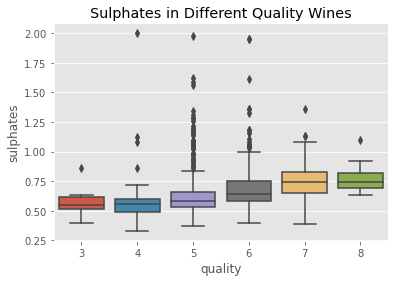

In [13]:
bp = sns.boxplot(x='quality',y='sulphates', data=df_wine)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

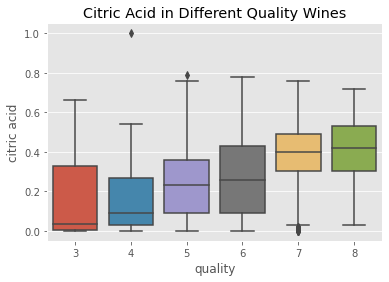

In [14]:
bp = sns.boxplot(x='quality',y='citric acid', data=df_wine)
bp.set(title="Citric Acid in Different Quality Wines")

In the case of the features "sulphates" and "citric_acid" the relation between them and quality seem to be linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of sulphates and citric acid to these wines seem to get them higher quality ratings.

### Acetic Acid Presence

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

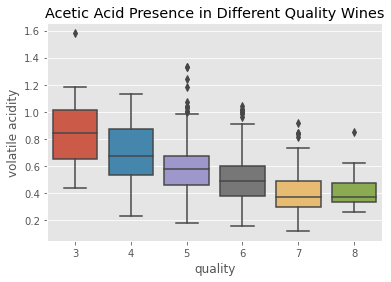

In [15]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=df_wine)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

For the acetic acid presence, we can clearly observe how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating.

The quality of the wines are in the set  {3,4,5,6,7,8} . We want to classify the wine into so-called 'bad' and 'good'. We study statistics of our dataset to determine how to make a classification.

In [16]:
df_wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Since the median quality is  6  and mean quaity is  ∼5,6 , we classify wine as 'poor' if quality is less then or equal to  6 , otherwise we classify the wine as 'good'. We repleace the column quality with the value  0  for 'poor' wine and the value  1  for 'good' wine.

In [17]:
badindex = df_wine.loc[df_wine['quality'] <= 6].index
goodindex = df_wine.loc[df_wine['quality'] > 6].index
df_wine.iloc[badindex, df_wine.columns.get_loc('quality')] = 0
df_wine.iloc[goodindex, df_wine.columns.get_loc('quality')] = 1

In [18]:
df_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Feature Selection

Now that we have already studied our dataset through histograms and different graphics it's time to select some features we will use in our machine learning algorithms. In this specific case, what we are going to do is use the same columns we studied before, since those are the four ones that give us the most information between features and quality.

In [19]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric acid         0.226373
volatile acidity   -0.390558
Name: quality, dtype: float64

## Split the Dataset for Training & Testing

In [20]:
#feature_space = df_wine.iloc[:, df_wine.columns != 'quality']
feature_space = df_wine.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
feature_class = df_wine.iloc[:, df_wine.columns == 'quality']

#Choosing 20% as training data.
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)

In [21]:
#ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array. 
#The returned array has the same data type as the source array or input array.
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

## Random Forest Classifier

In [22]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

## Hyper-Parameter Optimization using GridSearchCV

In [23]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [3, 5, 6, 7],
              'min_samples_split': [10, 20, 30, 40],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              'n_estimators':[50,100,150,200,250]}


cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 100}
Time taken in grid search:  2263.69


In [24]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 7)



RandomForestClassifier(max_depth=7, max_features='log2', random_state=42)

## OOB Rate

In [25]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [26]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

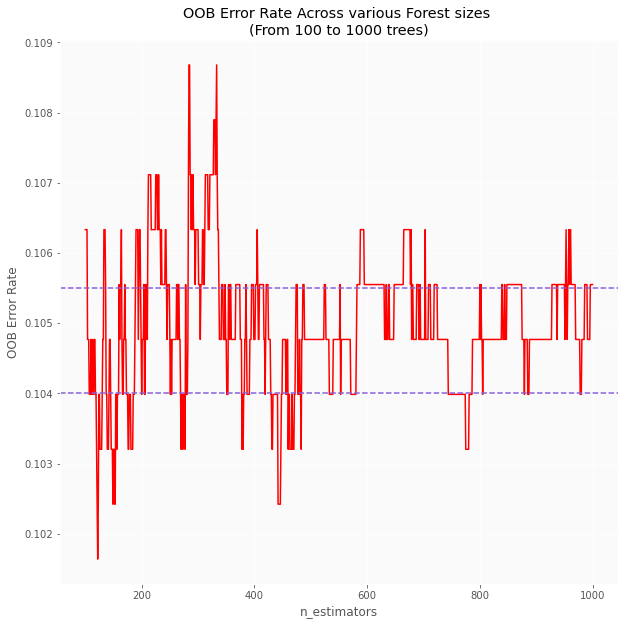

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.1055, color='#875FDB',linestyle='--')
plt.axhline(0.1040, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

In [28]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.10477


In [29]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=400,
                       random_state=42)

# Train the RandomForest

In [30]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=400,
                       random_state=42)

## Variable Importance

In [31]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [32]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [33]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [34]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
#names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
      # 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       #'pH', 'sulphates', 'alcohol', 'quality'] 
names = ['alcohol','sulphates','citric acid','volatile acidity']

In [36]:
names_index=names[:11]

In [37]:
names_index

['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

In [38]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'alcohol' has a Mean Decrease in Impurity of 0.36298
2. The feature 'sulphates' has a Mean Decrease in Impurity of 0.24141
3. The feature 'volatile acidity' has a Mean Decrease in Impurity of 0.21419
4. The feature 'citric acid' has a Mean Decrease in Impurity of 0.18141


## Predictions

In [39]:
predictions_rf = fit_rf.predict(test_set)

## Confusion Matrix

In [40]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

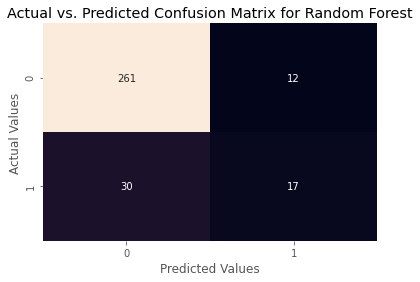

In [41]:
#Confussion Matrix for the Random Forest Model
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix for Random Forest')
plt.show()

## Accuracy

In [42]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our accuracy on the test set:
 0.869


## Error Rate

In [43]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1312


## Area Under Curve (AUC)

In [44]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(test_class_set,
                          predictions_prob,
                          pos_label = 1)

In [45]:
auc_rf = auc(fpr2, tpr2)

In [46]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

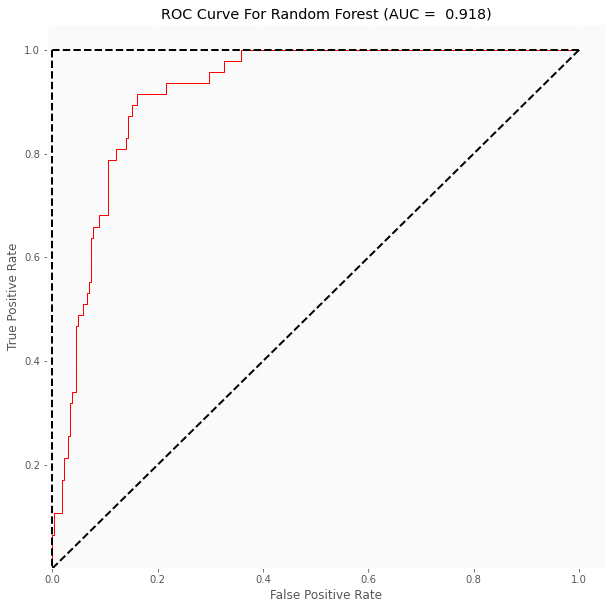

In [47]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Classification Report

In [48]:
dx=['Good Quality','Bad Quality']

In [49]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            test_class_set, 
            target_names = dx))

In [50]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

Good Quality       0.96      0.90      0.93       291
 Bad Quality       0.36      0.59      0.45        29

    accuracy                           0.87       320
   macro avg       0.66      0.74      0.69       320
weighted avg       0.90      0.87      0.88       320



## Decision Tree

In [51]:
#x = df_wine.drop('quality',axis=1)
x= df_wine.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
y = df_wine['quality']

In [52]:
#Choosing 20% as training data.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [53]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(xTrain, yTrain)
y_pred1 = model1.predict(xTest)
#print(classification_report(yTest, y_pred1))
class_report = print_class_report(y_pred1, 'Decision Tree')

Classification Report for Decision Tree:
              precision    recall  f1-score   support

Good Quality       0.88      0.92      0.90       262
 Bad Quality       0.55      0.45      0.50        58

    accuracy                           0.83       320
   macro avg       0.72      0.68      0.70       320
weighted avg       0.82      0.83      0.83       320



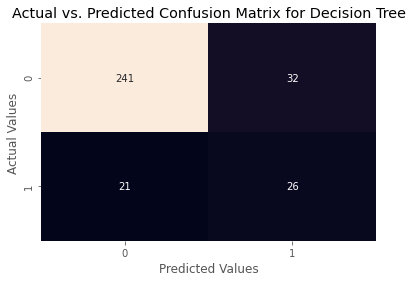

In [54]:
#Confussion Matrix for the Decision Tree Model
conf_mat = create_conf_mat(yTest, y_pred1)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix for Decision Tree')
plt.show()

# Linear Regression

In [55]:
#Fit the model and make prediction
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)
y_prediction_lr = regressor.predict(xTest)
y_prediction_lr = np.round(y_prediction_lr)
#print(classification_report(yTest, y_prediction_lr))
class_report = print_class_report(y_prediction_lr, 'Linear Regression')

Classification Report for Linear Regression:
              precision    recall  f1-score   support

Good Quality       0.99      0.86      0.92       315
 Bad Quality       0.04      0.40      0.08         5

    accuracy                           0.85       320
   macro avg       0.52      0.63      0.50       320
weighted avg       0.97      0.85      0.91       320



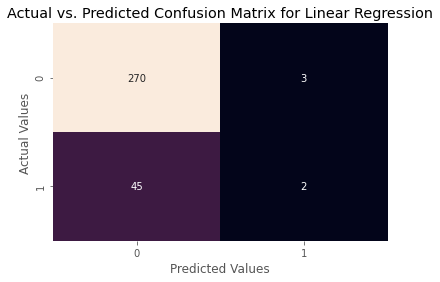

In [56]:
#Confussion Matrix for the Linear Regression Model
conf_mat = create_conf_mat(yTest, y_prediction_lr)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix for Linear Regression')
plt.show()

## RMSE of Models
After having prepared our models, it's now time to evaluate them. To do so we are going to use RMSE (Root Mean Square Error) which is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are so RMSE is a measure of how spread out these residuals are.

### Linear Regression RMSE

In [57]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = sqrt(mean_squared_error(yTest, y_prediction_lr))
print(RMSE)

0.3872983346207417


### Decision Tree Regressor RMSE

In [58]:
RMSE = sqrt(mean_squared_error(yTest, y_pred1))
print(RMSE)

0.40697051490249264


### Random Forest Regression RMSE

In [59]:
RMSE = sqrt(mean_squared_error(test_class_set, predictions_rf))
print(RMSE)

0.362284418654736


###  Improving the results with 1-Off Accuray

As we can see from the confusion matrices we show above our predictions aren't bad at all but in order to "improve" them we are going to apply a concept called 1-off accuracy, which states that if the distance between our predicted quality and the true quality is 1 (in absolut value), we will accept it as a correct prediction.

We will now create a function that will transform our predicted value into the true value if the distance between them is equal to 1. Afterwards we are going to plot the new correlation matrices and test the new values with some metrics.

In [60]:
def one_accuracy(predicted, true):
    i = 0
    for x,y in zip(predicted,true):
        if(abs(x-y)==1):
            predicted[i] = y
        i = i + 1

one_accuracy(y_prediction_lr, yTest)
one_accuracy(y_pred1, yTest)
one_accuracy(predictions_rf, yTest)

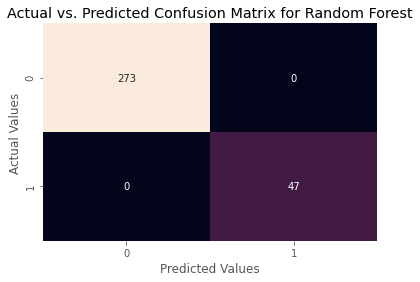

In [61]:
#Confussion Matrix for the Random Forest Model
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix for Random Forest')
plt.show()

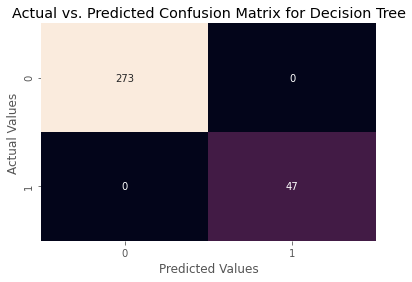

In [62]:
#Confussion Matrix for the Decision Tree Model
conf_mat = create_conf_mat(yTest, y_pred1)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix for Decision Tree')
plt.show()

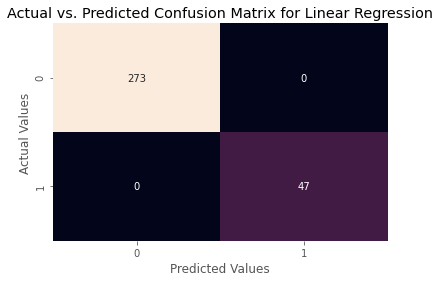

In [63]:
#Confussion Matrix for the Linear Regression Model
conf_mat = create_conf_mat(yTest, y_prediction_lr)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix for Linear Regression')
plt.show()

As we can see, our results are far better than the ones we obtained before. Therefore we are now going to calculate the new RMSE for all the three models.

In [67]:
RMSE_lr = sqrt(mean_squared_error(yTest, y_prediction_lr))
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
RMSE_dt = sqrt(mean_squared_error(yTest, y_pred1))
print("RMSE for new improved Decision Tree Regression is: " + str(RMSE_dt) + "\n")
RMSE_rf = sqrt(mean_squared_error(test_class_set, predictions_rf))
print("RMSE for new improved Random Forest Regression is: " + str(RMSE_rf) + "\n")

RMSE for new improved Linear Regression is: 0.0

RMSE for new improved Decision Tree Regression is: 0.0

RMSE for new improved Random Forest Regression is: 0.0



In [65]:
#pip install --upgrade prettytable

### Testing Our Models with Precision, Recall and F1 Score
#### For further testing, we are plotting a table that shows the precision, recall and f1score of our three regressor models.

In [72]:
import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(yTest, y_prediction_lr, average = 'weighted'),
           recall_score(yTest, y_prediction_lr, average = 'weighted'), f1_score(yTest, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(yTest, y_pred1, average = 'weighted'), recall_score(yTest, y_pred1, average = 'weighted'), 
           f1_score(yTest, y_pred1, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(test_class_set, predictions_rf, average = 'weighted'), recall_score(test_class_set, predictions_rf, average = 'weighted'),
           f1_score(test_class_set, predictions_rf, average = 'weighted')])
print(ptbl)

+-----------------+-----------+--------+---------+
| Regressor Model | Precision | Recall | F1Score |
+-----------------+-----------+--------+---------+
|      Linear     |    1.0    |  1.0   |   1.0   |
|  Decision Tree  |    1.0    |  1.0   |   1.0   |
|  Random Forest  |    1.0    |  1.0   |   1.0   |
+-----------------+-----------+--------+---------+


### When deciding which regression algorithm is better by looking at RMSE we would better choose the one with smaller value, so for this problem, Random Forest Regression seems to be the best fitting algorithm

By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

The vast majority of wines get a quality rating of five or six, while having good and bad wines seems more unlikely. There seem not to be any excellent wines (>8) on this database.

From the very first moment we saw there weren't strong correlations between features and quality, that's why it's hard to make an accurate prediction using regression algorithms. That said, alcohol, sulphates, citric_acid features are the ones that correlate the most positively while volatile_acidity is the one correlating the most negatively.

Applying the concept 1-off Accuracy gives us much better results.

Random Forest, Decision and Linear Regression all seem to be the best fitting models when solving this problem using regression.

Since there are only six different quality values in this dataset, it would be clever treating this problem as a multiclass classification problem (we can use the quality grouping approach we took earlier) and we might even get better results.